<a href="https://colab.research.google.com/github/SanthoshNagaraj94/Item_Demand_Forecasting/blob/main/item_demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from fbprophet import Prophet
sns.set()

In [198]:
data=pd.read_csv("Demand.csv")
data

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]

In [199]:
data.describe()


store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [201]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [202]:
Date=data.groupby(['date'])['sales'].sum()
Date=Date.index.tolist()

In [203]:
def item(x):
  items=data[data['item']==x]
  items=items.groupby(['date'])['sales'].sum()
  items=pd.DataFrame(items)
  
  return items

sales=pd.DataFrame({"date":Date})

cols=[]
Qty=[]

for i in range(1,51):
  sales["item_"+str(i)]=item(i)['sales'].tolist()
  cols.append("item_"+str(i))
  Qty.append(item(i)['sales'].sum())
sales


date  item_1  item_2  item_3  ...  item_47  item_48  item_49  item_50
0     2013-01-01     133     327     172  ...      116      277      159      330
1     2013-01-02      99     279     213  ...      118      281      159      384
2     2013-01-03     127     304     193  ...      104      280      187      356
3     2013-01-04     145     359     218  ...      128      296      184      394
4     2013-01-05     149     377     217  ...      133      344      179      407
...          ...     ...     ...     ...  ...      ...      ...      ...      ...
1821  2017-12-27     154     500     282  ...      171      374      231      511
1822  2017-12-28     178     495     298  ...      188      395      276      587
1823  2017-12-29     207     515     332  ...      213      496      237      596
1824  2017-12-30     236     538     342  ...      190      502      303      612
1825  2017-12-31     227     634     402  ...      211      494      285      626

[1826 rows x 51 columns]

In [204]:
item_Qty=pd.DataFrame({"ITEMS":cols,"Sales_Qty":Qty})
sort=item_Qty.sort_values(by='Sales_Qty')
sort

ITEMS  Sales_Qty
4    item_5     335230
0    item_1     401384
40  item_41     401759
46  item_47     401781
3    item_4     401907
26  item_27     402628
15  item_16     468480
33  item_34     469935
39  item_40     534094
36  item_37     534258
22  item_23     534979
48  item_49     535663
43  item_44     536811
16  item_17     602486
2    item_3     669087
41  item_42     669925
20  item_21     736190
29  item_30     736554
18  item_19     736892
38  item_39     801311
31  item_32     803107
19  item_20     867641
25  item_26     869981
42  item_43     936635
47  item_48     937703
8    item_9     938379
5    item_6    1068281
6    item_7    1068777
1    item_2    1069564
45  item_46    1070764
30  item_31    1070845
13  item_14    1071531
34  item_35    1201541
49  item_50    1203009
23  item_24    1205975
32  item_33    1270183
28  item_29    1271240
11  item_12    1271534
10  item_11    1271925
9   item_10    1337133
7    item_8    1405108
35  item_36    1406548
21  item_22    1469971
37  item_38    1470330
44  item_45    1471467
24  item_25    1473334
17  item_18    1538876
12  item_13    1539621
27  item_28    1604713
14  item_15    1607442

In [205]:
fig = make_subplots(shared_yaxes=True)
fig.add_trace(go.Bar(x=item_Qty.ITEMS, y=item_Qty.Sales_Qty,text=item_Qty.Sales_Qty, marker=dict(color=item_Qty.Sales_Qty, coloraxis="coloraxis")))
fig.show()

In [206]:
  
fig = make_subplots(shared_yaxes=True)
fig.add_trace(go.Bar(x=sort.ITEMS, y=sort.Sales_Qty,text=sort.Sales_Qty, marker=dict(color=sort.Sales_Qty, coloraxis="coloraxis")))
fig.show()

In [207]:
fig = px.pie(item_Qty, values='Sales_Qty', names='ITEMS', title='ITEM Sales')
fig.show()

In [208]:
def store(x):
  stores=data[data['store']==x]
  stores=stores.groupby(['date'])['sales'].sum()
  stores=pd.DataFrame(stores)
  
  return stores

store_Qty=pd.DataFrame({"date":Date})

cols=[]
Qty=[]

for i in range(1,11):
  store_Qty["store_"+str(i)]=store(i)['sales'].tolist()
  cols.append("store_"+str(i))
  Qty.append(store(i)['sales'].sum())
store_Qty


date  store_1  store_2  ...  store_8  store_9  store_10
0     2013-01-01     1316     1742  ...     1628     1383      1521
1     2013-01-02     1264     1808  ...     1687     1455      1530
2     2013-01-03     1305     1887  ...     1736     1492      1654
3     2013-01-04     1452     1983  ...     1966     1612      1739
4     2013-01-05     1499     2087  ...     2005     1698      1841
...          ...      ...      ...  ...      ...      ...       ...
1821  2017-12-27     1837     2624  ...     2468     2104      2221
1822  2017-12-28     1951     2839  ...     2660     2309      2429
1823  2017-12-29     2116     3025  ...     2923     2478      2687
1824  2017-12-30     2304     3151  ...     3109     2640      2742
1825  2017-12-31     2388     3370  ...     3205     2774      2939

[1826 rows x 11 columns]

In [209]:
STORE_Qty=pd.DataFrame({"STORES":cols,"Sales_Qty":Qty})
STORE_Qty

STORES  Sales_Qty
0   store_1    4315603
1   store_2    6120128
2   store_3    5435144
3   store_4    5012639
4   store_5    3631016
5   store_6    3627670
6   store_7    3320009
7   store_8    5856169
8   store_9    5025976
9  store_10    5360158

In [210]:
fig = make_subplots(shared_yaxes=True)
fig.add_trace(go.Bar(x=STORE_Qty.STORES, y=STORE_Qty.Sales_Qty,text=STORE_Qty.Sales_Qty, marker=dict(color=STORE_Qty.Sales_Qty, coloraxis="coloraxis")))
fig.show()

In [211]:
sort_store=STORE_Qty.sort_values(by='Sales_Qty')
sort_store

STORES  Sales_Qty
6   store_7    3320009
5   store_6    3627670
4   store_5    3631016
0   store_1    4315603
3   store_4    5012639
8   store_9    5025976
9  store_10    5360158
2   store_3    5435144
7   store_8    5856169
1   store_2    6120128

In [212]:
fig = make_subplots(shared_yaxes=True)
fig.add_trace(go.Bar(x=sort_store.STORES, y=sort_store.Sales_Qty,text=sort_store.Sales_Qty, marker=dict(color=sort_store.Sales_Qty, coloraxis="coloraxis")))
fig.show()

In [213]:
fig = px.pie(STORE_Qty, values='Sales_Qty', names='STORES', title='Store Sales')
fig.show()

In [214]:
data[(data['item']==1) &(data['store']==1)]['sales'].sum()

36468

In [215]:
data[(data['item']==2) &(data['store']==1)]['sales'].sum()

97050

In [216]:
data[(data['item']==1) &(data['store']==2)]['sales'].sum()

51445

In [217]:
consolidate_sale={"Item":[],"Store":[],"Sales":[]}

for i in range(1,51):
  for j in range (1,11):
   consolidate_sale['Item'].append(i)
   consolidate_sale['Store'].append(j)
   consolidate_sale['Sales'].append(data[(data['item']==i) &(data['store']==j)]['sales'].sum())


consolidate_sale=pd.DataFrame(consolidate_sale)

In [218]:
consolidate_sale

Item  Store   Sales
0       1      1   36468
1       1      2   51445
2       1      3   45778
3       1      4   41886
4       1      5   30566
..    ...    ...     ...
495    50      6   92243
496    50      7   83674
497    50      8  147855
498    50      9  126557
499    50     10  135192

[500 rows x 3 columns]

In [219]:
fig = px.bar(consolidate_sale, x='Store', y='Sales', color='Sales',
                facet_col='Item', facet_col_wrap=10,title="Total Sale of Item By Stores")
fig.show()

In [220]:
fig = px.scatter(consolidate_sale, x='Item', y='Sales', color='Item', size='Sales',
                facet_col='Store', facet_col_wrap=3)
fig.show()

In [221]:
store_Qty

date  store_1  store_2  ...  store_8  store_9  store_10
0     2013-01-01     1316     1742  ...     1628     1383      1521
1     2013-01-02     1264     1808  ...     1687     1455      1530
2     2013-01-03     1305     1887  ...     1736     1492      1654
3     2013-01-04     1452     1983  ...     1966     1612      1739
4     2013-01-05     1499     2087  ...     2005     1698      1841
...          ...      ...      ...  ...      ...      ...       ...
1821  2017-12-27     1837     2624  ...     2468     2104      2221
1822  2017-12-28     1951     2839  ...     2660     2309      2429
1823  2017-12-29     2116     3025  ...     2923     2478      2687
1824  2017-12-30     2304     3151  ...     3109     2640      2742
1825  2017-12-31     2388     3370  ...     3205     2774      2939

[1826 rows x 11 columns]

In [222]:
colss=store_Qty.columns.tolist()[1:]
colss

['store_1',
 'store_2',
 'store_3',
 'store_4',
 'store_5',
 'store_6',
 'store_7',
 'store_8',
 'store_9',
 'store_10']

In [223]:
def date_store(x,y):
  date_stores=pd.DataFrame({"Date":[],"Stores":[],"Sales":[]})
  date_stores['Date']=x.date
  date_stores['Stores']=y
  date_stores['Sales']=x[y]
  
  return date_stores
Date_store=[]
for i in colss:
  Date_store.append(date_store(store_Qty,i))


In [224]:
Date_storess=pd.concat([Date_store[0],Date_store[1],Date_store[2],Date_store[3],Date_store[4],Date_store[5],Date_store[6],Date_store[7],Date_store[8],Date_store[9]])

In [225]:
Date_storess.reset_index(drop=True, inplace=True)

In [226]:
Date_storess

Date    Stores  Sales
0      2013-01-01   store_1   1316
1      2013-01-02   store_1   1264
2      2013-01-03   store_1   1305
3      2013-01-04   store_1   1452
4      2013-01-05   store_1   1499
...           ...       ...    ...
18255  2017-12-27  store_10   2221
18256  2017-12-28  store_10   2429
18257  2017-12-29  store_10   2687
18258  2017-12-30  store_10   2742
18259  2017-12-31  store_10   2939

[18260 rows x 3 columns]

In [270]:

fig = px.line(Date_storess, x="Date", y='Sales',facet_col="Stores", facet_col_wrap=3, color='Stores')

fig.show()

In [228]:
item_colss=sales.columns.tolist()[1:]


In [229]:
def date_item(x,y):
  date_item=pd.DataFrame({"Date":[],"Item":[],"Sales":[]})
  date_item['Date']=x.date
  date_item['Item']=y
  date_item['Sales']=x[y]
  
  return date_item
Date_item=[]
for i in item_colss:
  Date_item.append(date_item(sales,i))


In [230]:
Date_item_con=pd.concat(Date_item)
Date_item_con.reset_index(drop=True, inplace=True)
Date_item_con

Date     Item  Sales
0      2013-01-01   item_1    133
1      2013-01-02   item_1     99
2      2013-01-03   item_1    127
3      2013-01-04   item_1    145
4      2013-01-05   item_1    149
...           ...      ...    ...
91295  2017-12-27  item_50    511
91296  2017-12-28  item_50    587
91297  2017-12-29  item_50    596
91298  2017-12-30  item_50    612
91299  2017-12-31  item_50    626

[91300 rows x 3 columns]

In [271]:

fig = px.line(Date_item_con, x="Date", y='Sales',facet_col="Item", facet_col_wrap=10, color='Item')

fig.show()

In [232]:
item_1=pd.DataFrame({"Date":sales['date'],"Item_1":sales['item_1']})
item_1

Date  Item_1
0     2013-01-01     133
1     2013-01-02      99
2     2013-01-03     127
3     2013-01-04     145
4     2013-01-05     149
...          ...     ...
1821  2017-12-27     154
1822  2017-12-28     178
1823  2017-12-29     207
1824  2017-12-30     236
1825  2017-12-31     227

[1826 rows x 2 columns]

In [272]:
fig = px.line(item_1, x="Date", y='Item_1',)

fig.show()

In [234]:
agg_data={"date":[],"sales":[]}

for i in range(len(item_1)):
    if len(item_1[i:i+90])==90:
        agg_data['date'].append(item_1.Date[i])
        agg_data['sales'].append(item_1.Item_1[i:i+90].sum())
agg_data=pd.DataFrame(agg_data)
agg_data

date  sales
0     2013-01-01  12847
1     2013-01-02  12848
2     2013-01-03  12936
3     2013-01-04  13019
4     2013-01-05  13103
...          ...    ...
1732  2017-09-29  20796
1733  2017-09-30  20704
1734  2017-10-01  20642
1735  2017-10-02  20578
1736  2017-10-03  20610

[1737 rows x 2 columns]

In [235]:
fig = px.line(agg_data, x="date", y='sales',)

fig.show()

In [236]:
def agg_item(x):
  x=pd.DataFrame({"Date":sales['date'],"Item":sales[x]})
  agg_data={"date":[],"sales":[]}

  for i in range(len(x)):
      if len(x[i:i+90])==90:
          agg_data['date'].append(x.Date[i])
          agg_data['sales'].append(x.Item[i:i+90].sum())
  agg_data=pd.DataFrame(agg_data)
  return agg_data

agg_item('item_1')

date  sales
0     2013-01-01  12847
1     2013-01-02  12848
2     2013-01-03  12936
3     2013-01-04  13019
4     2013-01-05  13103
...          ...    ...
1732  2017-09-29  20796
1733  2017-09-30  20704
1734  2017-10-01  20642
1735  2017-10-02  20578
1736  2017-10-03  20610

[1737 rows x 2 columns]

In [237]:
agg_item_data=pd.DataFrame({"date":agg_data['date']})
for i in sales.columns[1:]:
  agg_item_data[i]=agg_item(i)['sales']
agg_item_data

date  item_1  item_2  item_3  ...  item_47  item_48  item_49  item_50
0     2013-01-01   12847   34650   21420  ...    12965    30037    17099    38720
1     2013-01-02   12848   34724   21472  ...    13015    30109    17164    38874
2     2013-01-03   12936   34917   21580  ...    13072    30226    17254    39034
3     2013-01-04   13019   35113   21664  ...    13139    30348    17329    39200
4     2013-01-05   13103   35248   21783  ...    13183    30509    17400    39378
...          ...     ...     ...     ...  ...      ...      ...      ...      ...
1732  2017-09-29   20796   55526   35038  ...    20892    49122    27597    62200
1733  2017-09-30   20704   55278   34913  ...    20796    48893    27502    61962
1734  2017-10-01   20642   55020   34763  ...    20731    48699    27346    61687
1735  2017-10-02   20578   54778   34648  ...    20648    48587    27262    61392
1736  2017-10-03   20610   54886   34718  ...    20692    48651    27275    61395

[1737 rows x 51 columns]

In [238]:
def date_item(x,y):
  date_item=pd.DataFrame({"Date":[],"Item":[],"Sales":[]})
  date_item['Date']=x.date
  date_item['Item']=y
  date_item['Sales']=x[y]
  
  return date_item
Date_item=[]
for i in agg_item_data.columns[1:]:
  Date_item.append(date_item(agg_item_data,i))
AGG_Date_item_con=pd.concat(Date_item)
AGG_Date_item_con.reset_index(drop=True, inplace=True)
AGG_Date_item_con

Date     Item  Sales
0      2013-01-01   item_1  12847
1      2013-01-02   item_1  12848
2      2013-01-03   item_1  12936
3      2013-01-04   item_1  13019
4      2013-01-05   item_1  13103
...           ...      ...    ...
86845  2017-09-29  item_50  62200
86846  2017-09-30  item_50  61962
86847  2017-10-01  item_50  61687
86848  2017-10-02  item_50  61392
86849  2017-10-03  item_50  61395

[86850 rows x 3 columns]

In [239]:
fig = px.line(AGG_Date_item_con, x="Date", y='Sales',facet_col="Item", facet_col_wrap=10, color='Item')

fig.show()

In [240]:
def modeling(x,y):

  item_datas=pd.DataFrame({"ds":agg_item_data.date,"y":agg_item_data[y]})
  item_datas['ds']=pd.to_datetime(item_datas['ds'])
  

  return item_datas

modeling(agg_item_data,'item_1')

ds      y
0    2013-01-01  12847
1    2013-01-02  12848
2    2013-01-03  12936
3    2013-01-04  13019
4    2013-01-05  13103
...         ...    ...
1732 2017-09-29  20796
1733 2017-09-30  20704
1734 2017-10-01  20642
1735 2017-10-02  20578
1736 2017-10-03  20610

[1737 rows x 2 columns]

In [241]:
modeling(agg_item_data,'item_1')['ds'].dtype

dtype('<M8[ns]')

In [242]:
train,test=modeling(agg_item_data,'item_1')[modeling(agg_item_data,'item_1')['ds']<='2016-12-31'],modeling(agg_item_data,'item_1')[modeling(agg_item_data,'item_1')['ds']>'2016-12-31']
train,test

(             ds      y
 0    2013-01-01  12847
 1    2013-01-02  12848
 2    2013-01-03  12936
 3    2013-01-04  13019
 4    2013-01-05  13103
 ...         ...    ...
 1456 2016-12-27  17171
 1457 2016-12-28  17193
 1458 2016-12-29  17242
 1459 2016-12-30  17237
 1460 2016-12-31  17244
 
 [1461 rows x 2 columns],              ds      y
 1461 2017-01-01  17279
 1462 2017-01-02  17368
 1463 2017-01-03  17519
 1464 2017-01-04  17574
 1465 2017-01-05  17645
 ...         ...    ...
 1732 2017-09-29  20796
 1733 2017-09-30  20704
 1734 2017-10-01  20642
 1735 2017-10-02  20578
 1736 2017-10-03  20610
 
 [276 rows x 2 columns])

In [243]:
model=Prophet()

In [244]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [245]:
future_dates=model.make_future_dataframe(periods=366)
future_dates

ds
0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
4    2013-01-05
...         ...
1822 2017-12-28
1823 2017-12-29
1824 2017-12-30
1825 2017-12-31
1826 2018-01-01

[1827 rows x 1 columns]

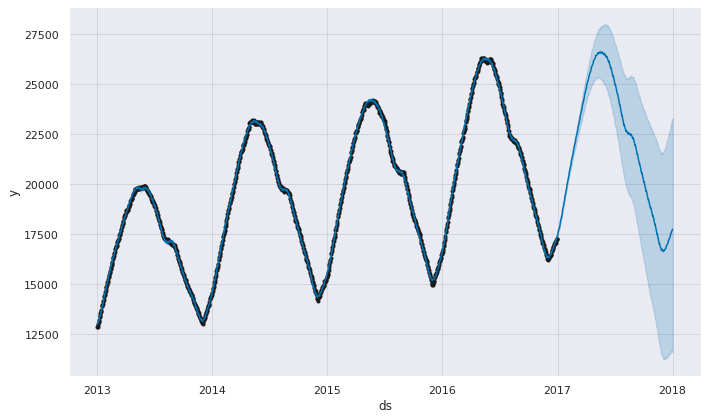

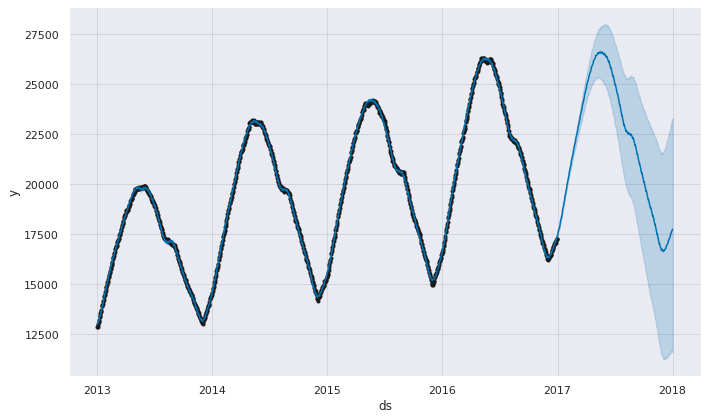

In [246]:
prediction=model.predict(future_dates)
model.plot(prediction )

In [247]:
prediction['yhat']

0       13003.397865
1       13017.356875
2       13060.488889
3       13095.183972
4       13128.640961
            ...     
1822    17583.604755
1823    17622.454408
1824    17659.202715
1825    17701.035026
1826    17743.672296
Name: yhat, Length: 1827, dtype: float64

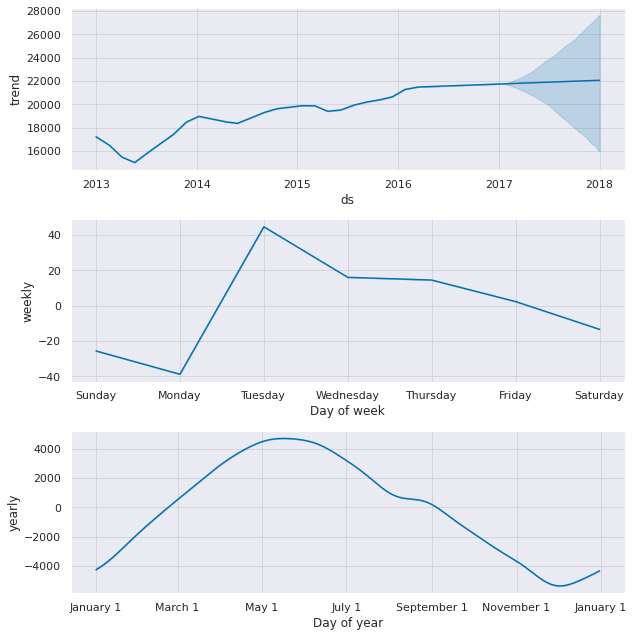

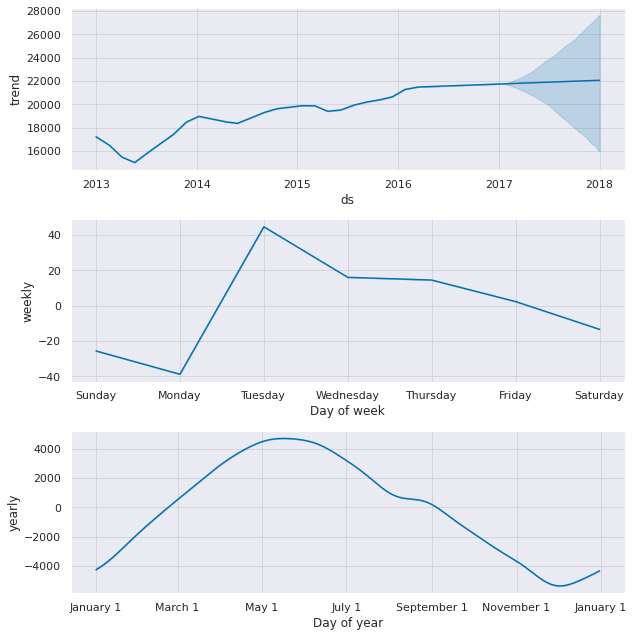

In [248]:
model.plot_components(prediction)

In [249]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model, initial='360 days', period='180 days', horizon='10 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-01-06 00:00:00 and 2016-12-21 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

ds          yhat    yhat_lower    yhat_upper      y     cutoff
0 2014-01-07  14968.415937  14931.320476  15005.755669  15090 2014-01-06
1 2014-01-08  14992.981458  14957.153129  15031.278526  15133 2014-01-06
2 2014-01-09  15035.596949  14998.673800  15072.750699  15226 2014-01-06
3 2014-01-10  15072.144057  15033.093945  15112.455244  15293 2014-01-06
4 2014-01-11  15107.689073  15067.999665  15144.810011  15368 2014-01-06

In [250]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

horizon           mse        rmse        mae      mape     mdape  coverage
0  1 days   4315.110554   65.689501  58.491350  0.003302  0.002861  0.571429
1  2 days   5994.926413   77.426910  68.096268  0.003679  0.003050  0.428571
2  3 days   7407.972443   86.069579  68.097014  0.003875  0.003136  0.714286
3  4 days   9852.277797   99.258641  73.325748  0.004405  0.002506  0.714286
4  5 days  14138.269243  118.904454  94.498665  0.005502  0.002805  0.571429

In [251]:
df_cv

ds          yhat    yhat_lower    yhat_upper      y     cutoff
0  2014-01-07  14968.415937  14931.320476  15005.755669  15090 2014-01-06
1  2014-01-08  14992.981458  14957.153129  15031.278526  15133 2014-01-06
2  2014-01-09  15035.596949  14998.673800  15072.750699  15226 2014-01-06
3  2014-01-10  15072.144057  15033.093945  15112.455244  15293 2014-01-06
4  2014-01-11  15107.689073  15067.999665  15144.810011  15368 2014-01-06
..        ...           ...           ...           ...    ...        ...
65 2016-12-27  17305.032963  17222.089098  17386.975191  17171 2016-12-21
66 2016-12-28  17328.834977  17243.898974  17401.558776  17193 2016-12-21
67 2016-12-29  17381.122244  17302.528026  17466.500126  17242 2016-12-21
68 2016-12-30  17424.135317  17344.774290  17506.814681  17237 2016-12-21
69 2016-12-31  17465.258185  17383.034219  17553.513071  17244 2016-12-21

[70 rows x 6 columns]

#Train error value

In [252]:
train

ds      y
0    2013-01-01  12847
1    2013-01-02  12848
2    2013-01-03  12936
3    2013-01-04  13019
4    2013-01-05  13103
...         ...    ...
1456 2016-12-27  17171
1457 2016-12-28  17193
1458 2016-12-29  17242
1459 2016-12-30  17237
1460 2016-12-31  17244

[1461 rows x 2 columns]

In [253]:
Train_Error=pd.DataFrame({"Date":train['ds'],"Y":train['y']})
Train_Error['Y_Hat']=round(prediction['yhat'][:1461],2)
Train_Error

Date      Y     Y_Hat
0    2013-01-01  12847  13003.40
1    2013-01-02  12848  13017.36
2    2013-01-03  12936  13060.49
3    2013-01-04  13019  13095.18
4    2013-01-05  13103  13128.64
...         ...    ...       ...
1456 2016-12-27  17171  17254.31
1457 2016-12-28  17193  17275.77
1458 2016-12-29  17242  17325.60
1459 2016-12-30  17237  17366.27
1460 2016-12-31  17244  17405.04

[1461 rows x 3 columns]

#Train_MAPE

In [254]:
Mape_Train=round(np.mean(np.abs((Train_Error.Y - Train_Error.Y_Hat)/Train_Error.Y)*100),3)
print("MAPE of Train Data : ",Mape_Train,"%")

MAPE of Train Data :  0.266 %


#Test Error

In [255]:
test

ds      y
1461 2017-01-01  17279
1462 2017-01-02  17368
1463 2017-01-03  17519
1464 2017-01-04  17574
1465 2017-01-05  17645
...         ...    ...
1732 2017-09-29  20796
1733 2017-09-30  20704
1734 2017-10-01  20642
1735 2017-10-02  20578
1736 2017-10-03  20610

[276 rows x 2 columns]

In [256]:
prediction['yhat'][1461:1737]

1461    17449.113386
1462    17494.178437
1463    17638.024606
1464    17671.966271
1465    17735.279068
            ...     
1732    20327.558175
1733    20249.184073
1734    20174.152698
1735    20097.960630
1736    20118.222766
Name: yhat, Length: 276, dtype: float64

In [257]:
Test_Error=pd.DataFrame({"Date":test['ds'],"Y":test['y']})
Test_Error['Y_Hat']=round(prediction['yhat'][1461:1737],2)
Test_Error

Date      Y     Y_Hat
1461 2017-01-01  17279  17449.11
1462 2017-01-02  17368  17494.18
1463 2017-01-03  17519  17638.02
1464 2017-01-04  17574  17671.97
1465 2017-01-05  17645  17735.28
...         ...    ...       ...
1732 2017-09-29  20796  20327.56
1733 2017-09-30  20704  20249.18
1734 2017-10-01  20642  20174.15
1735 2017-10-02  20578  20097.96
1736 2017-10-03  20610  20118.22

[276 rows x 3 columns]

#Train_MAPE

In [258]:
Mape_Test=round((np.mean(np.abs((Test_Error.Y - Test_Error.Y_Hat)/Test_Error.Y)*100)),3)
print("MAPE of Test Data : ",Mape_Test,"%")

MAPE of Test Data :  1.77 %


In [259]:
def modeling(x,y):

  item_datas=pd.DataFrame({"ds":agg_item_data.date,"y":agg_item_data[y]})
  item_datas['ds']=pd.to_datetime(item_datas['ds'])
  

  return item_datas

modeling(agg_item_data,'item_1')

ds      y
0    2013-01-01  12847
1    2013-01-02  12848
2    2013-01-03  12936
3    2013-01-04  13019
4    2013-01-05  13103
...         ...    ...
1732 2017-09-29  20796
1733 2017-09-30  20704
1734 2017-10-01  20642
1735 2017-10-02  20578
1736 2017-10-03  20610

[1737 rows x 2 columns]

In [260]:
def modeling(x,y):
  item_datas=pd.DataFrame({"ds":agg_item_data.date,"y":agg_item_data[y]})
  item_datas['ds']=pd.to_datetime(item_datas['ds'])
  return item_datas
def consol_prediction(x,future):
  data=modeling(agg_item_data,x)
  train,test=data[data['ds']<='2016-12-31'],data[data['ds']>'2016-12-31']
  model=Prophet()
  model.fit(train)
  future_dates=model.make_future_dataframe(periods=future)
  prediction=model.predict(future_dates)

  return round(prediction['yhat'])

consol_prediction('item_1',366)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0       13003.0
1       13017.0
2       13060.0
3       13095.0
4       13129.0
         ...   
1822    17584.0
1823    17622.0
1824    17659.0
1825    17701.0
1826    17744.0
Name: yhat, Length: 1827, dtype: float64

In [261]:
forecasted_Sales=pd.DataFrame({"Date":future_dates.ds})

for i in agg_item_data.columns[1:]:
  print(i)
  forecasted_Sales[i]=consol_prediction(i,366) 


forecasted_Sales

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_1
item_2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_3


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_4


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_5


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_6


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_7


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_8


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_9


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_11


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_12


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_13


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_14


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_15


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_16


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_17


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_18


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_19


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_21


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_22


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_23


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_24


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_26


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_27


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_28


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_29


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_31


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_32


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_33


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_34


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_35


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_36


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_37


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_38


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_39


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_40


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_41


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_42


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_43


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_44


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_45


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_46


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_47


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_48


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_49


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


item_50


Date   item_1   item_2   item_3  ...  item_47  item_48  item_49  item_50
0    2013-01-01  13003.0  34981.0  21633.0  ...  13109.0  30243.0  17267.0  39088.0
1    2013-01-02  13017.0  35005.0  21662.0  ...  13119.0  30288.0  17288.0  39135.0
2    2013-01-03  13060.0  35113.0  21739.0  ...  13158.0  30399.0  17348.0  39270.0
3    2013-01-04  13095.0  35187.0  21801.0  ...  13190.0  30487.0  17392.0  39375.0
4    2013-01-05  13129.0  35267.0  21860.0  ...  13223.0  30572.0  17441.0  39492.0
...         ...      ...      ...      ...  ...      ...      ...      ...      ...
1822 2017-12-28  17584.0  44188.0  28976.0  ...  17552.0  40454.0  23466.0  51087.0
1823 2017-12-29  17622.0  44273.0  29042.0  ...  17590.0  40540.0  23516.0  51192.0
1824 2017-12-30  17659.0  44361.0  29105.0  ...  17629.0  40622.0  23569.0  51305.0
1825 2017-12-31  17701.0  44454.0  29173.0  ...  17665.0  40718.0  23624.0  51417.0
1826 2018-01-01  17744.0  44547.0  29244.0  ...  17708.0  40806.0  23679.0  51535.0

[1827 rows x 51 columns]

In [262]:
Three_mont_forecast=pd.DataFrame(forecasted_Sales.iloc[-1])
Three_mont_forecast.head()

1826
Date    2018-01-01 00:00:00
item_1              17744.0
item_2              44547.0
item_3              29244.0
item_4              16656.0

In [263]:
Three_month_forecast=pd.DataFrame({"ITEM's":Three_mont_forecast.index[1:],"Sale_Forecast(2018_Q1)":Three_mont_forecast[1826][1:].tolist()})
Three_month_forecast

ITEM's  Sale_Forecast(2018_Q1)
0    item_1                 17744.0
1    item_2                 44547.0
2    item_3                 29244.0
3    item_4                 16656.0
4    item_5                 15020.0
5    item_6                 46155.0
6    item_7                 45196.0
7    item_8                 60409.0
8    item_9                 42337.0
9   item_10                 58148.0
10  item_11                 54970.0
11  item_12                 54553.0
12  item_13                 66232.0
13  item_14                 45847.0
14  item_15                 68847.0
15  item_16                 21190.0
16  item_17                 25944.0
17  item_18                 66467.0
18  item_19                 32625.0
19  item_20                 38804.0
20  item_21                 31223.0
21  item_22                 62879.0
22  item_23                 22846.0
23  item_24                 51258.0
24  item_25                 62644.0
25  item_26                 37821.0
26  item_27                 16227.0
27  item_28                 68459.0
28  item_29                 56053.0
29  item_30                 31904.0
30  item_31                 46303.0
31  item_32                 33968.0
32  item_33                 55549.0
33  item_34                 19807.0
34  item_35                 53776.0
35  item_36                 59528.0
36  item_37                 23069.0
37  item_38                 65211.0
38  item_39                 34955.0
39  item_40                 22531.0
40  item_41                 17005.0
41  item_42                 29153.0
42  item_43                 40003.0
43  item_44                 23107.0
44  item_45                 63396.0
45  item_46                 45655.0
46  item_47                 17708.0
47  item_48                 40806.0
48  item_49                 23679.0
49  item_50                 51535.0

In [264]:
Sort_Three_month_forecast=Three_month_forecast.sort_values(by='Sale_Forecast(2018_Q1)')

fig = make_subplots(shared_yaxes=True)
fig.add_trace(go.Bar(x=Sort_Three_month_forecast["ITEM's"], y=Sort_Three_month_forecast['Sale_Forecast(2018_Q1)'],text=Sort_Three_month_forecast['Sale_Forecast(2018_Q1)'], marker=dict(color=Sort_Three_month_forecast['Sale_Forecast(2018_Q1)'], coloraxis="coloraxis")))
fig.show()

In [265]:
agg_item_data.iloc[:,1:]

item_1  item_2  item_3  item_4  ...  item_47  item_48  item_49  item_50
0      12847   34650   21420   12884  ...    12965    30037    17099    38720
1      12848   34724   21472   12940  ...    13015    30109    17164    38874
2      12936   34917   21580   13041  ...    13072    30226    17254    39034
3      13019   35113   21664   13109  ...    13139    30348    17329    39200
4      13103   35248   21783   13155  ...    13183    30509    17400    39378
...      ...     ...     ...     ...  ...      ...      ...      ...      ...
1732   20796   55526   35038   20892  ...    20892    49122    27597    62200
1733   20704   55278   34913   20814  ...    20796    48893    27502    61962
1734   20642   55020   34763   20693  ...    20731    48699    27346    61687
1735   20578   54778   34648   20635  ...    20648    48587    27262    61392
1736   20610   54886   34718   20647  ...    20692    48651    27275    61395

[1737 rows x 50 columns]

In [266]:
Agg_train=agg_item_data.iloc[:1461,1:]
Agg_train_Pred=forecasted_Sales.iloc[:1461,1:]
print("MAPE of Train Data")
Mape_Train=round((np.mean(np.abs((Agg_train - Agg_train_Pred)/Agg_train)*100)),3)
Mape_Train,print("Mean Of all Item Error : ",round(Mape_Train.mean(),2),"%")

MAPE of Train Data
Mean Of all Item Error :  0.22 %


(item_1     0.266
 item_2     0.214
 item_3     0.216
 item_4     0.237
 item_5     0.285
 item_6     0.216
 item_7     0.203
 item_8     0.211
 item_9     0.220
 item_10    0.190
 item_11    0.217
 item_12    0.220
 item_13    0.192
 item_14    0.206
 item_15    0.215
 item_16    0.240
 item_17    0.227
 item_18    0.216
 item_19    0.214
 item_20    0.201
 item_21    0.234
 item_22    0.204
 item_23    0.213
 item_24    0.208
 item_25    0.208
 item_26    0.211
 item_27    0.265
 item_28    0.195
 item_29    0.223
 item_30    0.212
 item_31    0.202
 item_32    0.220
 item_33    0.218
 item_34    0.256
 item_35    0.210
 item_36    0.198
 item_37    0.213
 item_38    0.201
 item_39    0.203
 item_40    0.229
 item_41    0.255
 item_42    0.218
 item_43    0.211
 item_44    0.236
 item_45    0.204
 item_46    0.226
 item_47    0.236
 item_48    0.207
 item_49    0.234
 item_50    0.218
 dtype: float64, None)

In [267]:
Agg_Test=agg_item_data.iloc[1461:1737,1:]
Agg_test_Pred=forecasted_Sales.iloc[1461:1737,1:]
print("MAPE of Test Data")
Mape_Test=round((np.mean(np.abs((Agg_Test - Agg_test_Pred)/Agg_Test)*100)),3)
Mape_Test,print("Mean Of all Item Error : ",round(Mape_Test.mean(),2),"%")

MAPE of Test Data
Mean Of all Item Error :  3.34 %


(item_1     1.770
 item_2     5.208
 item_3     3.048
 item_4     4.479
 item_5     1.279
 item_6     2.834
 item_7     4.086
 item_8     3.675
 item_9     0.937
 item_10    3.563
 item_11    3.123
 item_12    3.478
 item_13    3.585
 item_14    3.762
 item_15    3.859
 item_16    1.236
 item_17    2.631
 item_18    3.381
 item_19    2.510
 item_20    1.424
 item_21    4.391
 item_22    3.564
 item_23    4.220
 item_24    3.948
 item_25    3.630
 item_26    3.244
 item_27    6.351
 item_28    3.939
 item_29    2.306
 item_30    3.180
 item_31    3.315
 item_32    4.801
 item_33    3.019
 item_34    5.010
 item_35    1.581
 item_36    4.161
 item_37    3.646
 item_38    1.633
 item_39    2.932
 item_40    4.207
 item_41    4.800
 item_42    2.671
 item_43    4.472
 item_44    3.096
 item_45    3.797
 item_46    3.602
 item_47    2.431
 item_48    3.219
 item_49    2.574
 item_50    3.428
 dtype: float64, None)

In [268]:
Three_month_forecast["Train_MAPE_%"]=Mape_Train.tolist()
Three_month_forecast["Test_MAPE_%"]=Mape_Test.tolist()
Three_month_forecast

ITEM's  Sale_Forecast(2018_Q1)  Train_MAPE_%  Test_MAPE_%
0    item_1                 17744.0         0.266        1.770
1    item_2                 44547.0         0.214        5.208
2    item_3                 29244.0         0.216        3.048
3    item_4                 16656.0         0.237        4.479
4    item_5                 15020.0         0.285        1.279
5    item_6                 46155.0         0.216        2.834
6    item_7                 45196.0         0.203        4.086
7    item_8                 60409.0         0.211        3.675
8    item_9                 42337.0         0.220        0.937
9   item_10                 58148.0         0.190        3.563
10  item_11                 54970.0         0.217        3.123
11  item_12                 54553.0         0.220        3.478
12  item_13                 66232.0         0.192        3.585
13  item_14                 45847.0         0.206        3.762
14  item_15                 68847.0         0.215        3.859
15  item_16                 21190.0         0.240        1.236
16  item_17                 25944.0         0.227        2.631
17  item_18                 66467.0         0.216        3.381
18  item_19                 32625.0         0.214        2.510
19  item_20                 38804.0         0.201        1.424
20  item_21                 31223.0         0.234        4.391
21  item_22                 62879.0         0.204        3.564
22  item_23                 22846.0         0.213        4.220
23  item_24                 51258.0         0.208        3.948
24  item_25                 62644.0         0.208        3.630
25  item_26                 37821.0         0.211        3.244
26  item_27                 16227.0         0.265        6.351
27  item_28                 68459.0         0.195        3.939
28  item_29                 56053.0         0.223        2.306
29  item_30                 31904.0         0.212        3.180
30  item_31                 46303.0         0.202        3.315
31  item_32                 33968.0         0.220        4.801
32  item_33                 55549.0         0.218        3.019
33  item_34                 19807.0         0.256        5.010
34  item_35                 53776.0         0.210        1.581
35  item_36                 59528.0         0.198        4.161
36  item_37                 23069.0         0.213        3.646
37  item_38                 65211.0         0.201        1.633
38  item_39                 34955.0         0.203        2.932
39  item_40                 22531.0         0.229        4.207
40  item_41                 17005.0         0.255        4.800
41  item_42                 29153.0         0.218        2.671
42  item_43                 40003.0         0.211        4.472
43  item_44                 23107.0         0.236        3.096
44  item_45                 63396.0         0.204        3.797
45  item_46                 45655.0         0.226        3.602
46  item_47                 17708.0         0.236        2.431
47  item_48                 40806.0         0.207        3.219
48  item_49                 23679.0         0.234        2.574
49  item_50                 51535.0         0.218        3.428

In [269]:
Three_month_forecast.to_csv("Three_month_forecast.csv")